<a href="https://colab.research.google.com/github/aditya17-creator/Login-Page/blob/master/AI_Task_1_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import Sequential, Model
from tensorflow.keras.applications.xception import Xception
from keras.layers import Flatten, Dense, Softmax
from keras.preprocessing import image
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

In [ ]:
model = Sequential()
model.add(Xception(include_top=False, weights=None, input_shape=(299, 299, 3), pooling='avg'))
model.add(Flatten())
model.add(Dense(43))
model.add(Softmax())
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
pwd

'/content/drive/My Drive'

In [ ]:
import os
os.chdir('/content/drive/MyDrive/')

In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
trainDataFrame = pd.read_csv('/content/drive/MyDrive/AI_Internship/Train.csv')
testDataFrame = pd.read_csv('/content/drive/MyDrive/AI_Internship/Test.csv')

In [ ]:
trainDataFrame.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
trainDataFrame['ClassId'] = trainDataFrame['ClassId'].astype(str)
testDataFrame['ClassId'] = testDataFrame['ClassId'].astype(str)

In [ ]:
for i in range(0, len(trainDataFrame['ClassId'])):
    if len(trainDataFrame['ClassId'][i]) == 1:
        trainDataFrame['ClassId'][i] = '0' + trainDataFrame['ClassId'][i]
for i in range(0, len(testDataFrame['ClassId'])):
    if len(testDataFrame['ClassId'][i]) == 1:
        testDataFrame['ClassId'][i] = '0' + testDataFrame['ClassId'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


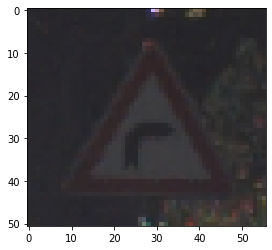

In [ ]:
img = Image.open('/content/drive/MyDrive/AI_Internship/' + trainDataFrame['Path'][20])
plt.imshow(img)

In [ ]:
trainDataGen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2
)
testDataGen = image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
trainDataGenerator = trainDataGen.flow_from_dataframe(
    dataframe=trainDataFrame,
    directory='/content/drive/MyDrive/AI_Internship/',
    x_col='Path',
    y_col='ClassId',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

Found 39209 validated image filenames belonging to 43 classes.


In [ ]:
testDataGenerator = testDataGen.flow_from_dataframe(
    dataframe=testDataFrame,
    directory='/content/drive/MyDrive/AI_Internship/',
    x_col='Path',
    y_col='ClassId',
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical'
)

Found 12630 validated image filenames belonging to 43 classes.


In [ ]:
history = model.fit(trainDataGenerator, epochs=5 , verbose=1)

Epoch 1/5
1226/1226 [==============================] - 10627s 9s/step - loss: 1.6111 - accuracy: 0.5366
Epoch 2/5
1226/1226 [==============================] - 1419s 1s/step - loss: 0.0580 - accuracy: 0.9833
Epoch 3/5
1226/1226 [==============================] - 1436s 1s/step - loss: 0.0332 - accuracy: 0.9905
Epoch 4/5
1226/1226 [==============================] - 1461s 1s/step - loss: 0.0331 - accuracy: 0.9896
Epoch 5/5
1226/1226 [==============================] - 1431s 1s/step - loss: 0.0220 - accuracy: 0.9940


In [ ]:
model.evaluate(testDataGenerator, verbose=1)

790/790 [==============================] - 4360s 6s/step - loss: 0.2495 - accuracy: 0.9475


[0.2495332956314087, 0.9475059509277344]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


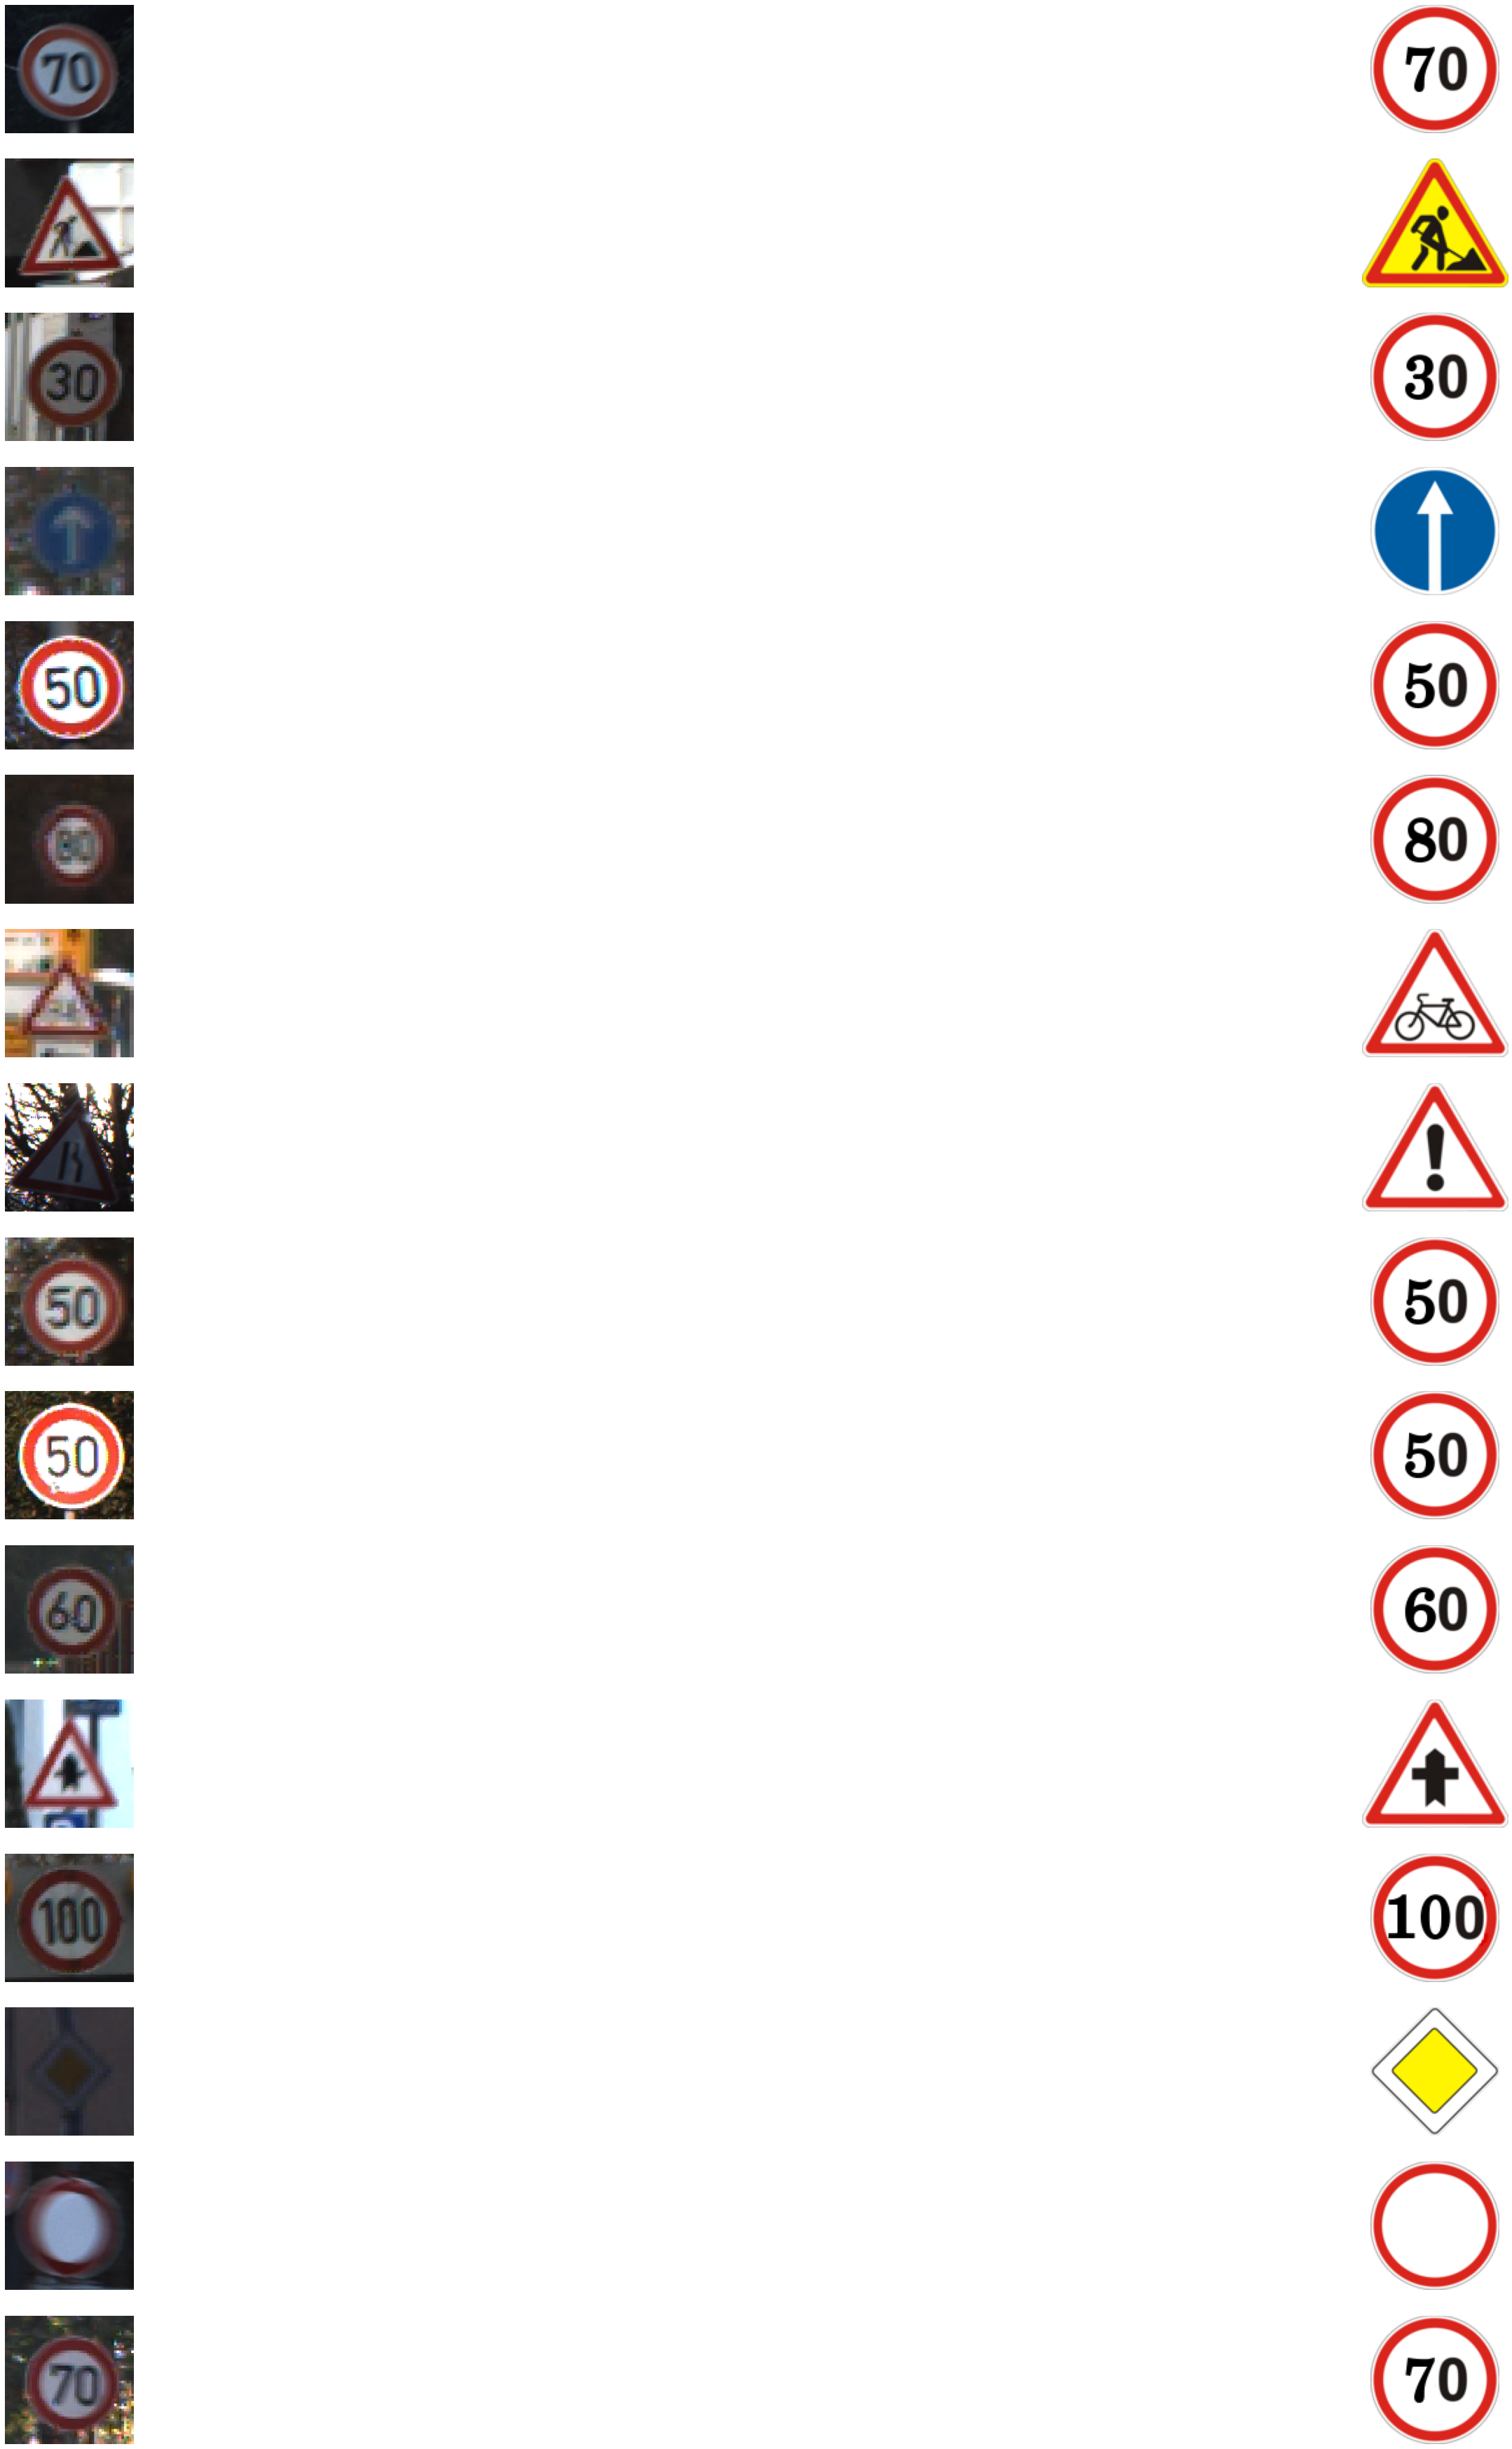

In [ ]:
test_batch = 2
plt.figure(figsize=(64, 64))
plt.tight_layout()
for i in range(0, 16): 
  
    plt.subplot(16, 2, 2 * i + 1), plt.axis('off')
    plt.imshow(testDataGenerator[test_batch][0][i])
    pre = model.predict_classes(testDataGenerator[test_batch][0])
    img = Image.open('/content/drive/MyDrive/AI_Internship/Meta/' + str(pre[i]) + '.png')
    plt.subplot(16, 2, 2 * i + 2), plt.axis('off')
    plt.imshow(img)